# House Price Prediction

![House](https://www.rocketmortgage.com/resources-cmsassets/RocketMortgage.com/Article_Images/Large_Images/TypesOfHomes/types-of-homes-hero.jpg)

# Data Exploration

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
!pip install lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading datset
df=pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [3]:
# checking first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# checking last 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# checking null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# checking duplicate values
df.duplicated().value_counts()

False    545
dtype: int64

In [7]:
# checking column names
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# checking unique values
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [10]:
# getting statistical summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


# Data Visualization

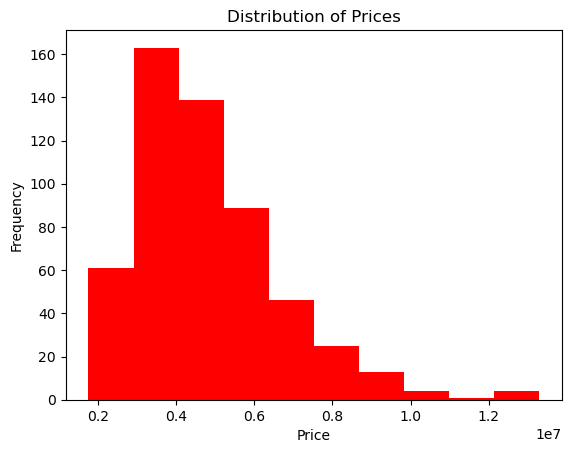

In [11]:
# Visualizing 'price'
plt.hist(df['price'], color='r')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

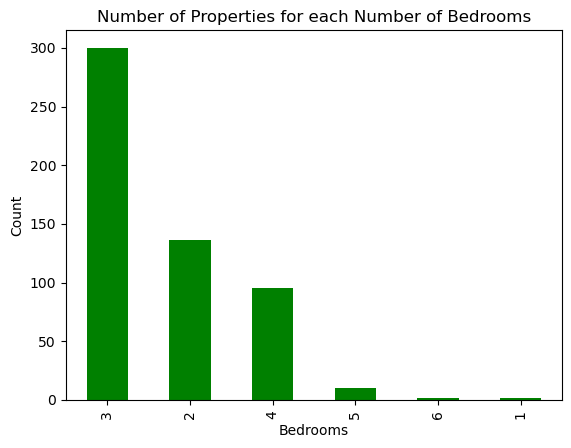

In [12]:
# Visualizing 'bedrooms'
df['bedrooms'].value_counts().plot(kind='bar', color='g')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Number of Properties for each Number of Bedrooms')
plt.show()

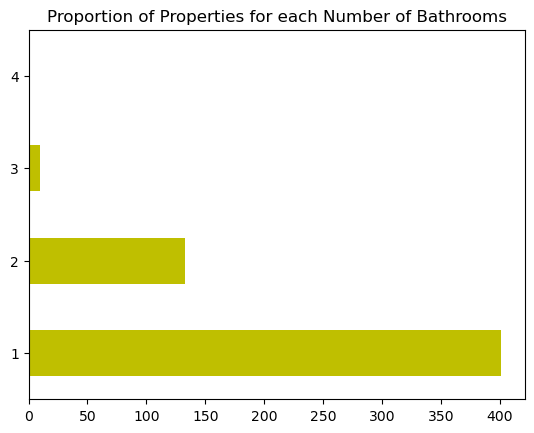

In [13]:
# Visualizing 'bathrooms'
df['bathrooms'].value_counts().plot(kind='barh', color='y')
plt.title('Proportion of Properties for each Number of Bathrooms')
plt.show()

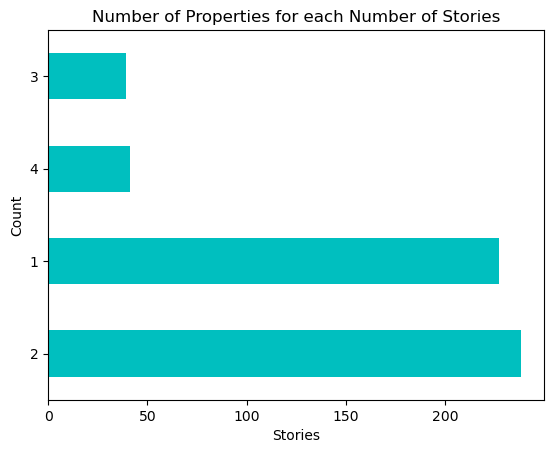

In [14]:
# Visualizing 'stories'
df['stories'].value_counts().plot(kind='barh', color='c')
plt.xlabel('Stories')
plt.ylabel('Count')
plt.title('Number of Properties for each Number of Stories')
plt.show()

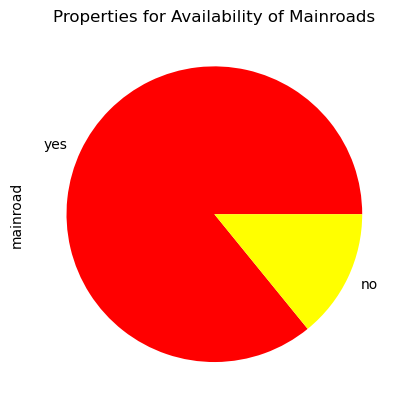

In [15]:
# Visualizing 'mainroads'
df['mainroad'].value_counts().plot(kind='pie', colors=['red', 'yellow'])
plt.title('Properties for Availability of Mainroads')
plt.show()

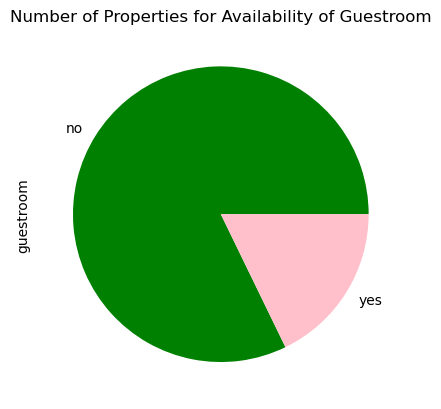

In [16]:
# Visualizing 'guestrooms'
df['guestroom'].value_counts().plot(kind='pie', colors=['green', 'pink'])
plt.title('Number of Properties for Availability of Guestroom')
plt.show()

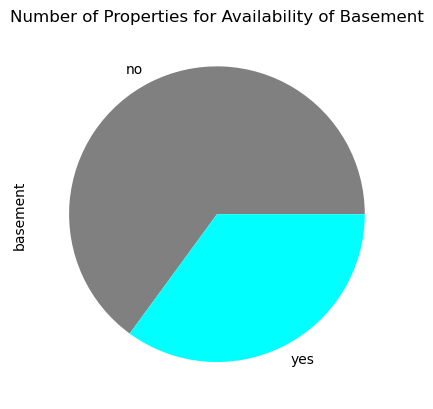

In [17]:
# Visualizing 'basement'
df['basement'].value_counts().plot(kind='pie', colors=['grey', 'cyan'])
plt.title('Number of Properties for Availability of Basement')
plt.show()

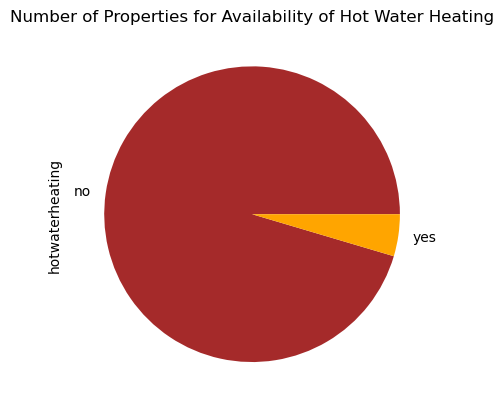

In [18]:
# Visualizing 'Hot Water Heating'
df['hotwaterheating'].value_counts().plot(kind='pie', colors=['brown', 'orange'])
plt.title('Number of Properties for Availability of Hot Water Heating')
plt.show()

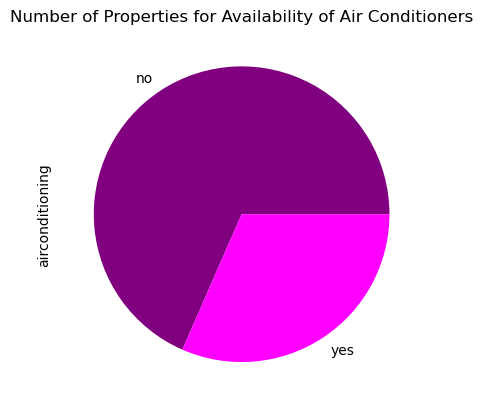

In [19]:
# Visualizing 'Air Conditioners'
df['airconditioning'].value_counts().plot(kind='pie', colors=['purple', 'magenta'])
plt.title('Number of Properties for Availability of Air Conditioners')
plt.show()

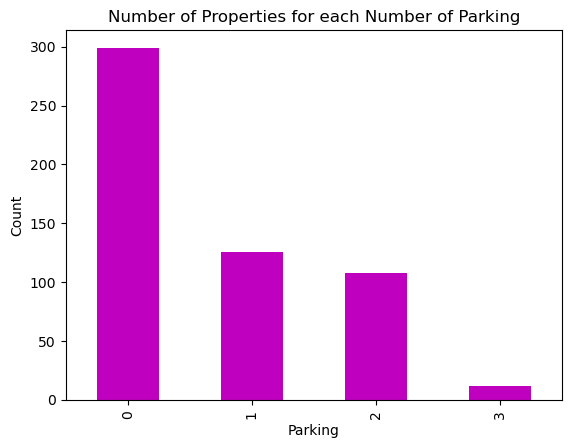

In [20]:
# Visualizing 'parking'
df['parking'].value_counts().plot(kind='bar', color='m')
plt.xlabel('Parking')
plt.ylabel('Count')
plt.title('Number of Properties for each Number of Parking')
plt.show()

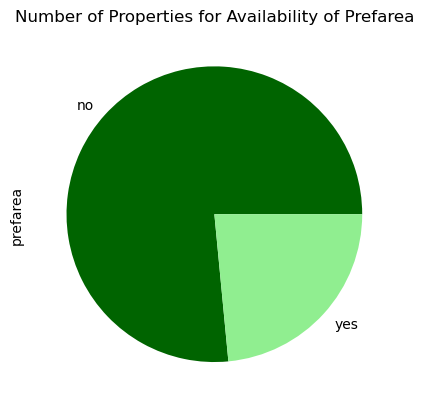

In [21]:
# Visualizing 'prefarea'
df['prefarea'].value_counts().plot(kind='pie', colors=['darkgreen', 'lightgreen'])
plt.title('Number of Properties for Availability of Prefarea')
plt.show()

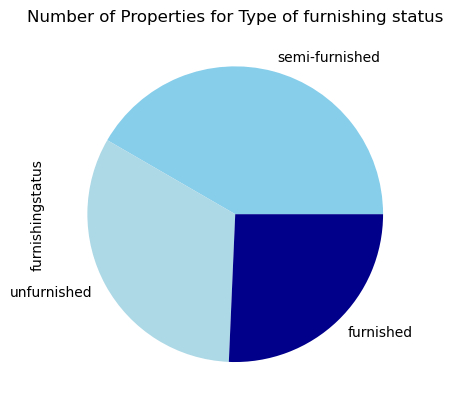

In [22]:
# Visualizing 'furnishing status'
df['furnishingstatus'].value_counts().plot(kind='pie', colors=['skyblue', 'lightblue', 'darkblue'])
plt.title('Number of Properties for Type of furnishing status')
plt.show()

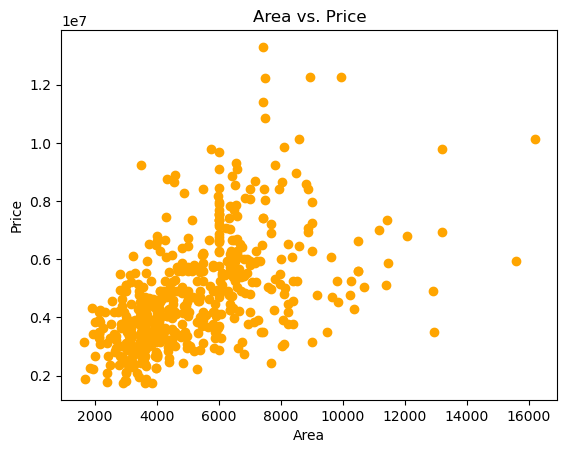

In [23]:
# Visualizing 'area' vs. 'price'
plt.scatter(df['area'], df['price'], color='orange')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

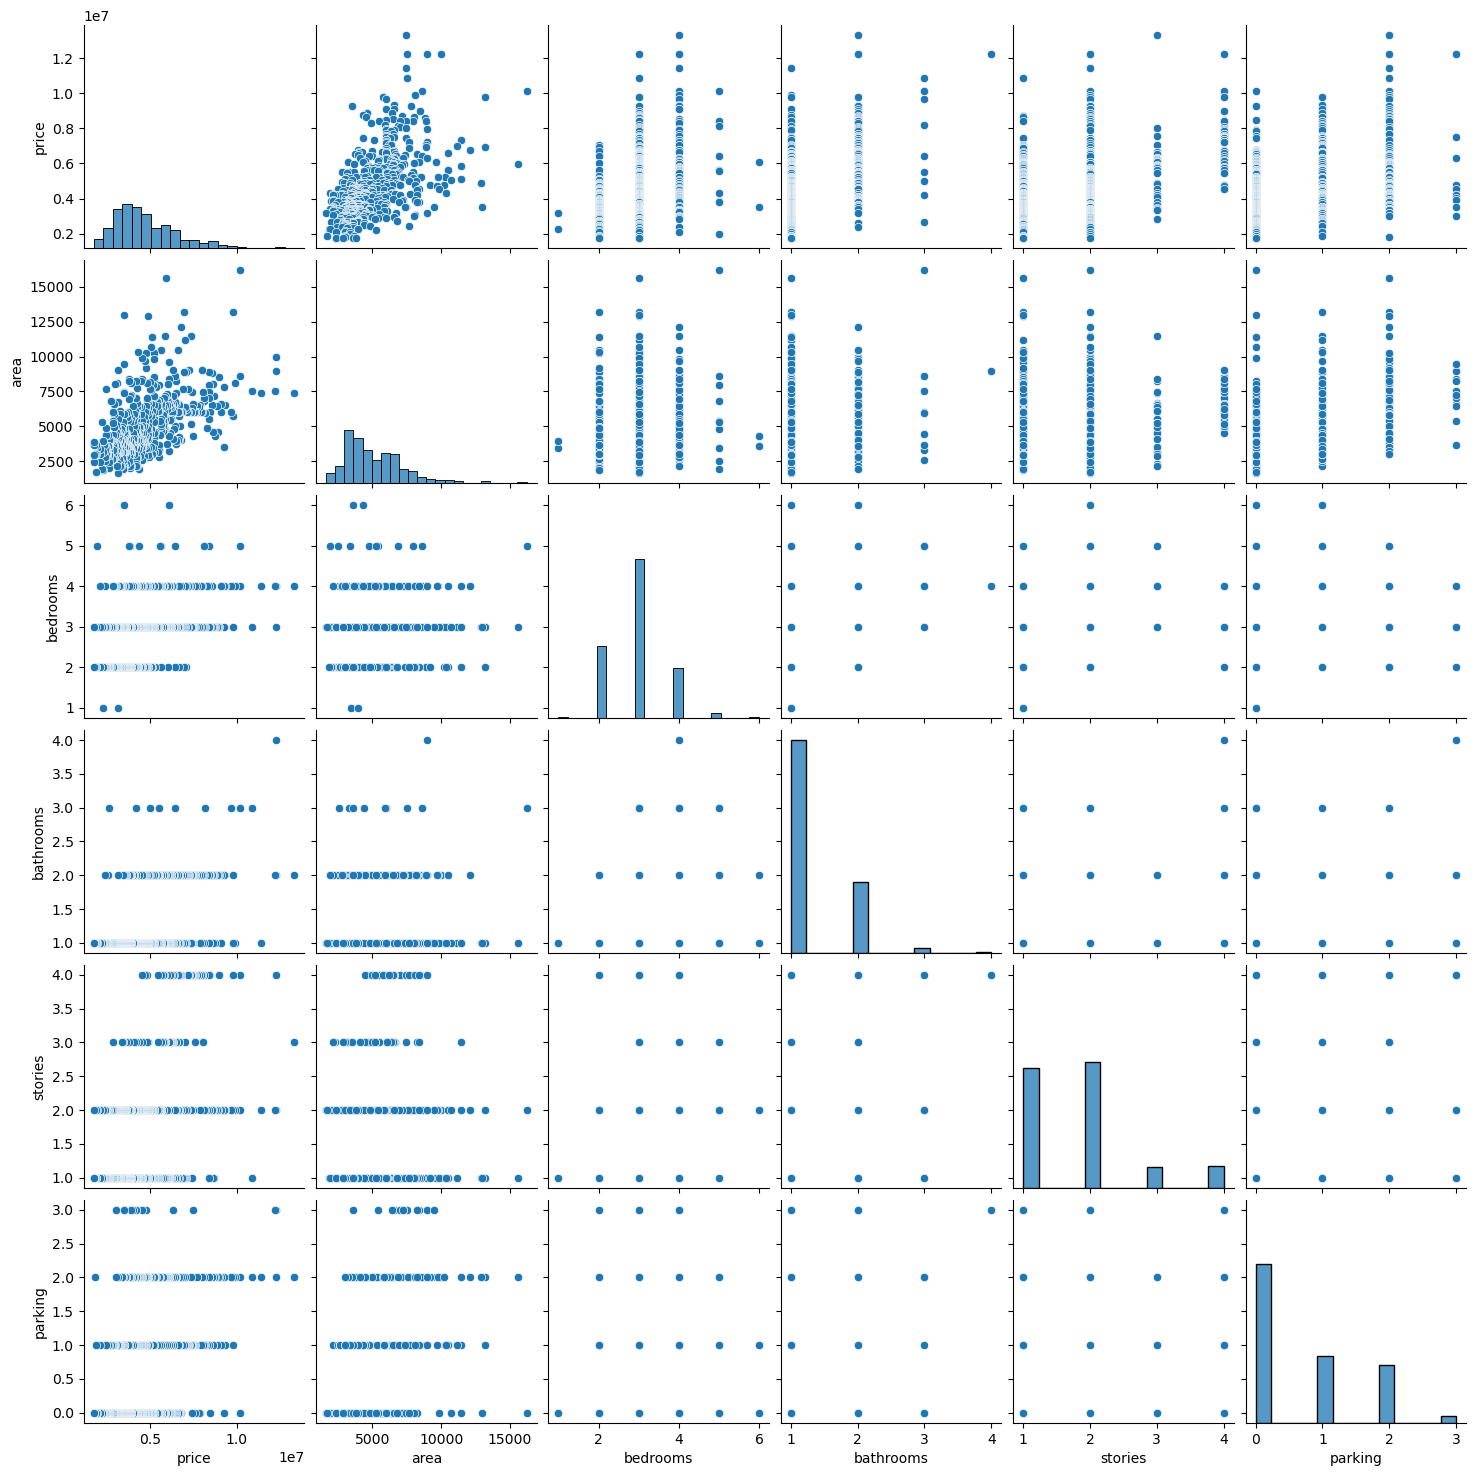

In [24]:
# Creating a pair plot
sns.pairplot(df)
plt.show()

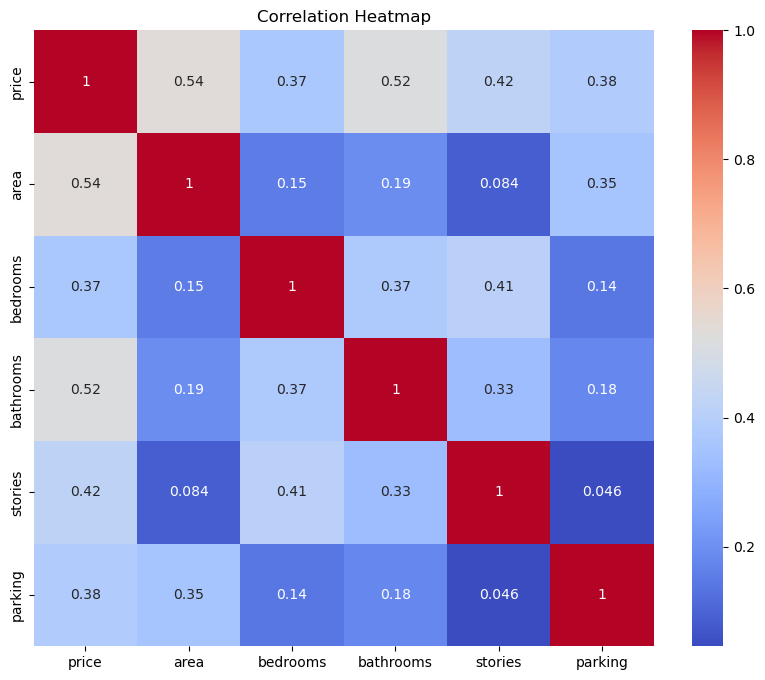

In [25]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Creating a correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [26]:
# Select the columns to encode
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Perform label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# Machine Learning Model

## Splitting the dataset

In [27]:
X = df.drop('price', axis=1)  # Features (excluding the target variable)
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:14<00:00,  2.94it/s]


In [29]:
print(models)

                               Adjusted R-Squared  R-Squared         RMSE  \
Model                                                                       
GradientBoostingRegressor                    0.62       0.66   1301871.87   
PoissonRegressor                             0.62       0.66   1303698.42   
LassoLarsCV                                  0.61       0.65   1331071.42   
LassoLarsIC                                  0.61       0.65   1331071.42   
LarsCV                                       0.61       0.65   1331071.42   
Lars                                         0.61       0.65   1331071.42   
TransformedTargetRegressor                   0.61       0.65   1331071.42   
LinearRegression                             0.61       0.65   1331071.42   
Lasso                                        0.61       0.65   1331072.08   
LassoLars                                    0.61       0.65   1331072.09   
Ridge                                        0.61       0.65   1331290.05   

In [30]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.62,0.66,1301871.87,0.20
PoissonRegressor,0.62,0.66,1303698.42,0.01
LassoLarsCV,0.61,0.65,1331071.42,0.03
LassoLarsIC,0.61,0.65,1331071.42,0.02
LarsCV,0.61,0.65,1331071.42,0.05
Lars,0.61,0.65,1331071.42,0.08
TransformedTargetRegressor,0.61,0.65,1331071.42,0.01
LinearRegression,0.61,0.65,1331071.42,0.01
Lasso,0.61,0.65,1331072.08,0.01


## Gradient Boosting Regressor

In [31]:
# Create and fit the Gradient Boosting Regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Model Evaluation

In [32]:
# Evaluate the model using metrics
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the evaluation metrics
print("Training set - RMSE:", train_rmse)
print("Training set - MAE:", train_mae)
print("Testing set - RMSE:", test_rmse)
print("Testing set - MAE:", test_mae)

Training set - RMSE: 641817.0283186645
Training set - MAE: 476055.9856965125
Testing set - RMSE: 1304950.7999729184
Testing set - MAE: 966134.8573462408


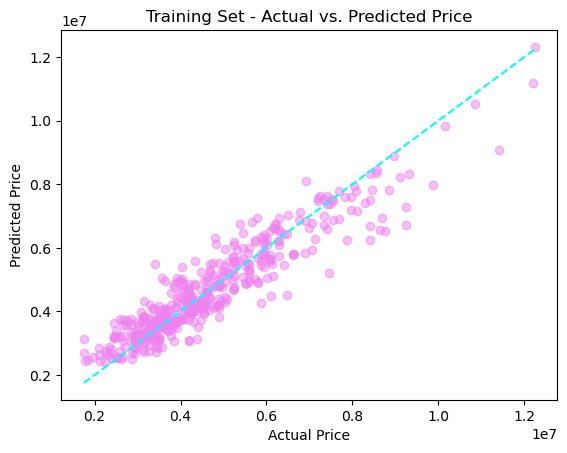

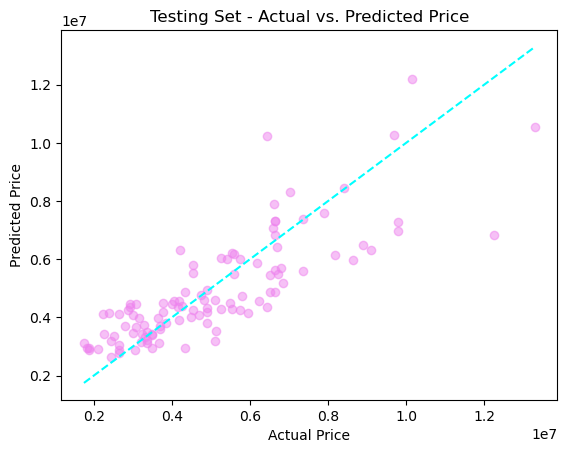

In [33]:
# Visualize the predicted values vs. actual values for the training set
plt.scatter(y_train, train_predictions, color='violet', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='cyan', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Set - Actual vs. Predicted Price')
plt.show()

# Visualize the predicted values vs. actual values for the testing set
plt.scatter(y_test, test_predictions, color='violet', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='cyan', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Set - Actual vs. Predicted Price')
plt.show()

# Model Interpretation

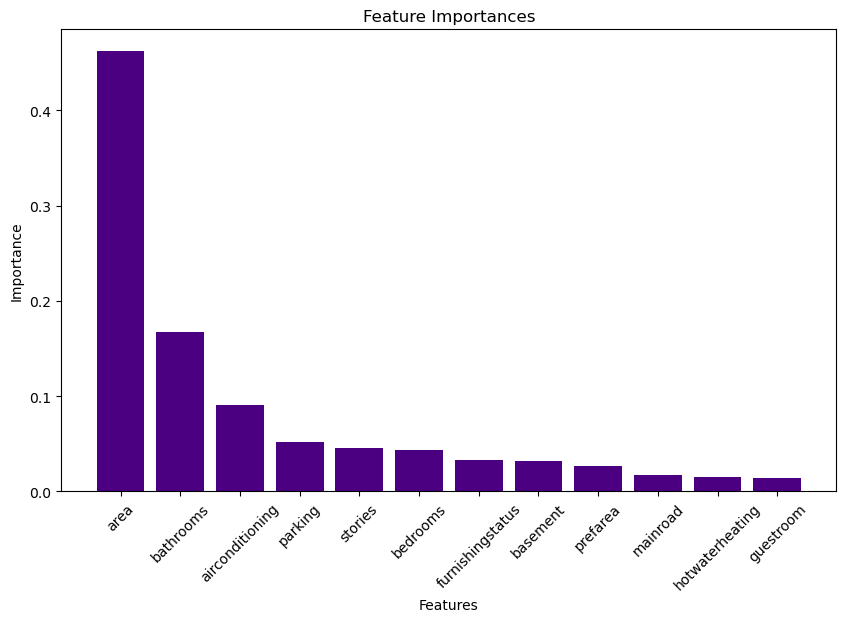

In [34]:
importances = model.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features, color='indigo')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Predicting price for new house

In [35]:
# Example input for a new house
new_house = np.array([[2000, 4, 3, 2, 1, 1, 2, 1, 1, 2, 3, 1]])

# Predict the price for the new house
predicted_price = model.predict(new_house)

print('Predicted Price:', predicted_price)

Predicted Price: [7225136.02639168]
